In [1]:
#importing all libraries that will be used during the program
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 999

In [3]:
#read the data from "houses.csv"file and store it in "data" variable 
data = pd.read_csv("houses.csv")
data_t = data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [5]:
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
timestamp,2011-08-20,2011-08-23,2011-08-27,2011-09-01,2011-09-05
full_sq,43,34,43,89,77
life_sq,27,19,29,50,77
floor,4,3,2,9,4
max_floor,NaN,NaN,NaN,NaN,NaN
material,NaN,NaN,NaN,NaN,NaN
build_year,NaN,NaN,NaN,NaN,NaN
num_room,NaN,NaN,NaN,NaN,NaN
kitch_sq,NaN,NaN,NaN,NaN,NaN


In [6]:
data.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

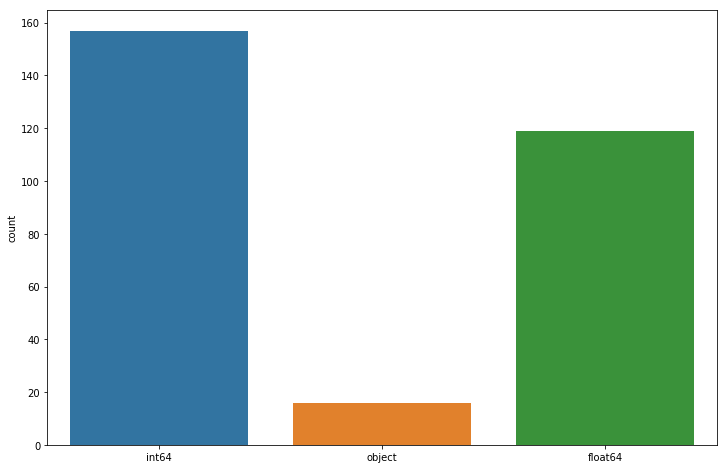

In [7]:
# Here we can see visualize what types of data we have in our dataset
plt.figure(figsize=(12,8))
sns.countplot(data.dtypes,)
plt.show()

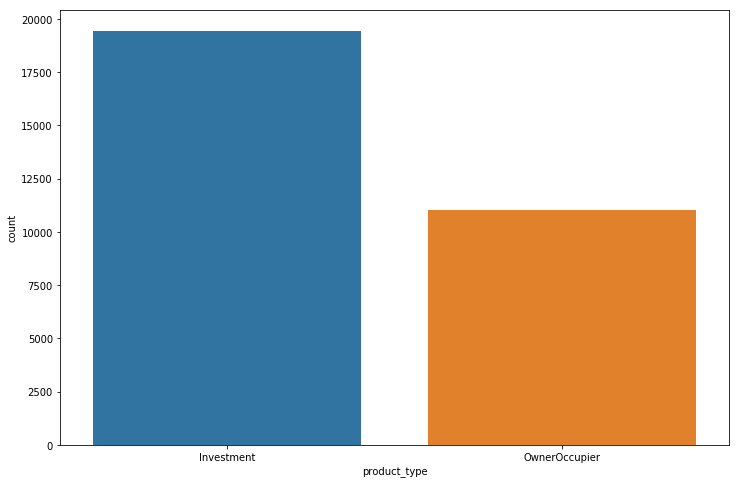

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(data['product_type'])
plt.show()

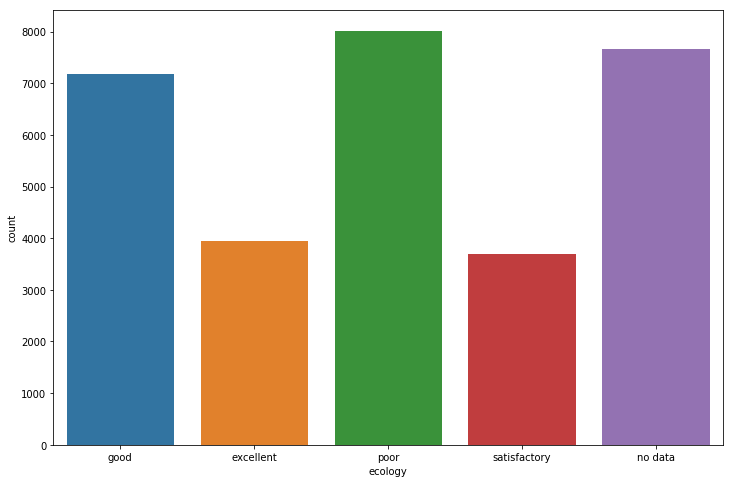

In [9]:
# We can see that we have a lot of missing values especially in this variable.
plt.figure(figsize=(12,8))
sns.countplot(data['ecology'])
plt.show()

In [10]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(50)

,Missing Ratio
hospital_beds_raion,47.392603
build_year,44.649011
state,44.498047
cafe_sum_500_min_price_avg,43.585704
cafe_sum_500_max_price_avg,43.585704
cafe_avg_price_500,43.585704
max_floor,31.413475
material,31.413475
num_room,31.413475
kitch_sq,31.413475


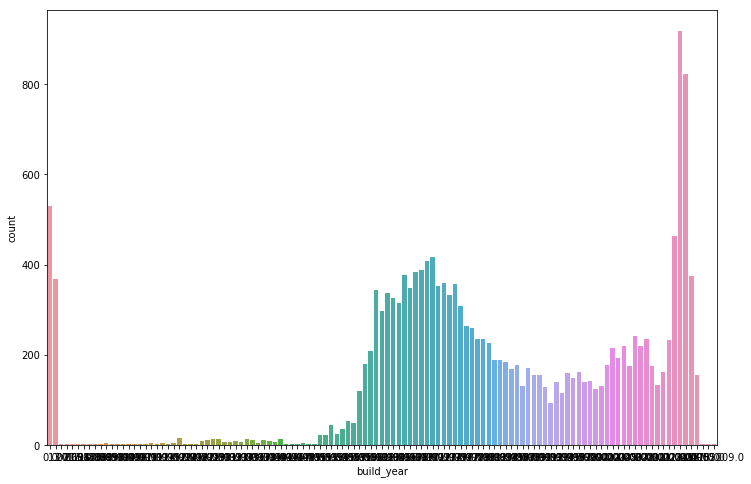

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data['build_year'])
plt.show()

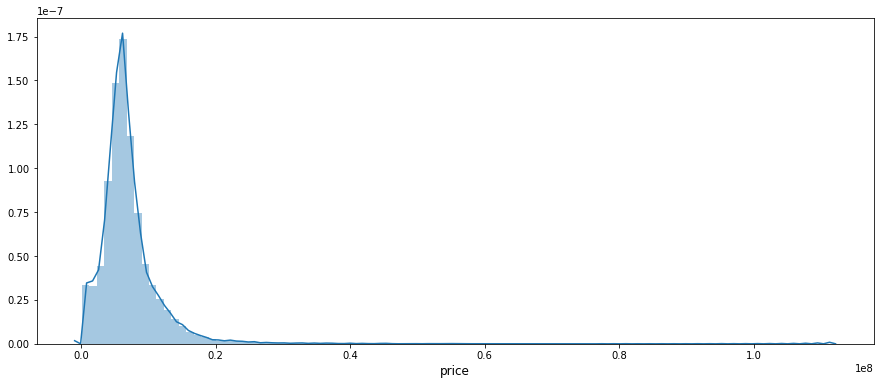

In [12]:
# Based on the graph we can state that our dependent variable is not normally distributed.
plt.figure(figsize=(15,6))
sns.distplot(data.price_doc.values, bins=100, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

((array([-4.07764062, -3.86644899, -3.75109077, ...,  3.75109077,
          3.86644899,  4.07764062]),
  array([   100000,    190000,    200000, ...,  91066096,  95122496,
         111111112], dtype=int64)),
 (4044925.830231847, 7123035.277739492, 0.8461027847764815))

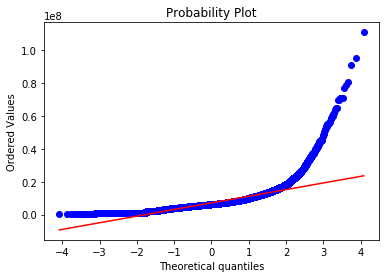

In [13]:
stats.probplot(data["price_doc"], plot=plt)

In [14]:
print("Some information about prices")
print("Count: {}".format(data.price_doc.count()))
print("Mean: {}".format(data.price_doc.mean()))
print("Standard deviation: {}".format(data.price_doc.std()))
print("Median: {}".format(data.price_doc.median()))
print("Mode: {}".format(data.price_doc.mode()[0]))
print("Maximum: {}".format(data.price_doc.max()))
print("Minimum: {}".format(data.price_doc.min()))
print("Skewness: {}".format(data.price_doc.skew()))
print("Kurtosis: {}".format(data.price_doc.kurt()))

Some information about prices
Count: 30471
Mean: 7123035.27773949
Standard deviation: 4780111.329633822
Median: 6274411.0
Mode: 2000000
Maximum: 111111112
Minimum: 100000
Skewness: 4.474744873569561
Kurtosis: 44.02736802190458


As you can see from above graphs, our price_doc variable is not normally distributed (the easiest way to understand that is to notise that the probability plot is not a straight line but curved one). However, linear model are better on predicting variables that are normally distributed. So lets try to make the price variable more normal in distribution sence.<br>
Note that price_doc column is positively skewed and has high peak (kurtosis is about 44, that is, in fact, really high peack). taking logarithm in this case is a way of normailizing the distribution.Let's do it and see the results.

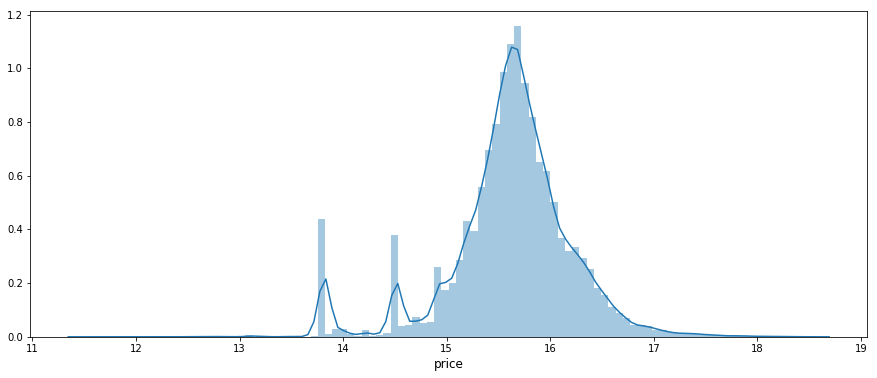

In [15]:
# Log specification of house prices.
price_new=np.log(data['price_doc'])
plt.figure(figsize=(15,6))
sns.distplot(price_new.values, bins=100, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

((array([-4.07764062, -3.86644899, -3.75109077, ...,  3.75109077,
          3.86644899,  4.07764062]),
  array([11.51292546, 12.15477935, 12.20607265, ..., 18.32709613,
         18.37067605, 18.52604127])),
 (0.5865158853981434, 15.609482964208997, 0.9700194987386126))

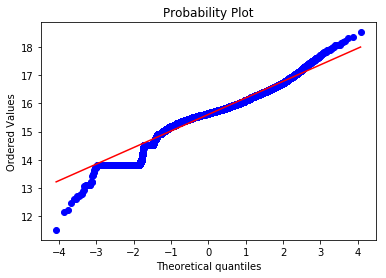

In [16]:
stats.probplot(price_new, plot=plt)

Logarithm did its magical job and now we have a distribution which is closer to normal distribution.

# <br>Develop basic model based on avaliable information<br>

In [17]:
#drop all columns that are object type or have null values 
null_cols = data.columns[data.isnull().any()]
new_data = data.drop(null_cols, axis = 1)
new_data = new_data.select_dtypes(exclude=['object'])

In [18]:
# Dividing the dataset to train and test parts
x = new_data.drop("price_doc", axis = 1)
y = new_data.price_doc
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [20]:
lm.score(x_train,y_train)

0.34782673200455416

In [21]:
lm.score(x_test,y_test)

0.3777795109390024

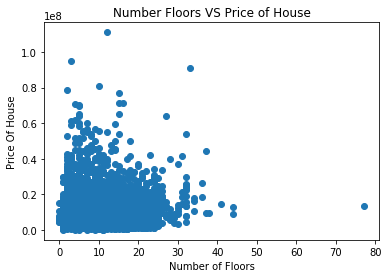

In [22]:
y=data["price_doc"]
x=data["floor"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Number of Floors")
plt.ylabel("Price Of House")
plt.title("Number Floors VS Price of House")
plt.show()

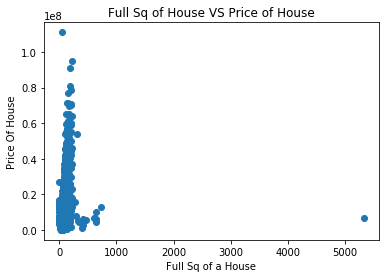

In [23]:
y=data["price_doc"]
x=data["full_sq"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Full Sq of a House")
plt.ylabel("Price Of House")
plt.title("Full Sq of House VS Price of House")
plt.show()

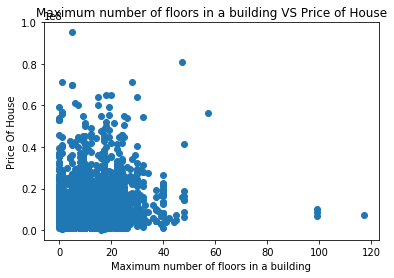

In [24]:
y=data["price_doc"]
x=data["max_floor"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Maximum number of floors in a building")
plt.ylabel("Price Of House")
plt.title("Maximum number of floors in a building VS Price of House")
plt.show()

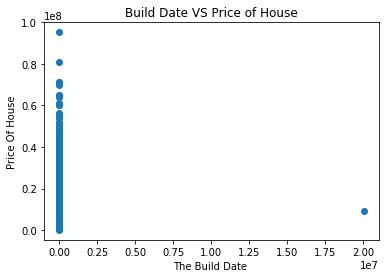

In [25]:
y=data["price_doc"]
x=data["build_year"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("The Build Date ")
plt.ylabel("Price Of House")
plt.title("Build Date VS Price of House")
plt.show()

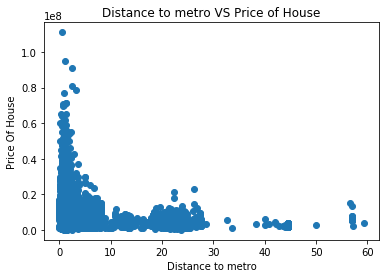

In [26]:
y=data["price_doc"]
x=data["metro_km_walk"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Distance to metro")
plt.ylabel("Price Of House")
plt.title("Distance to metro VS Price of House")
plt.show()

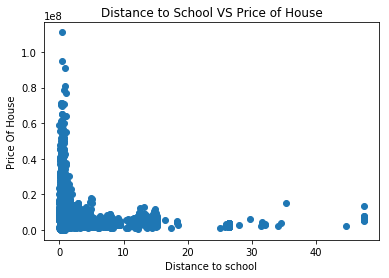

In [27]:
y=data["price_doc"]
x=data["school_km"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Distance to school")
plt.ylabel("Price Of House")
plt.title("Distance to School VS Price of House")
plt.show()

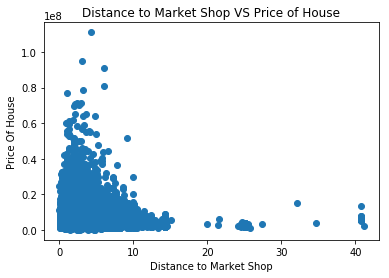

In [28]:
x=data["market_shop_km"]
y=data["price_doc"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Distance to Market Shop")
plt.ylabel("Price Of House")
plt.title("Distance to Market Shop VS Price of House")
plt.show()

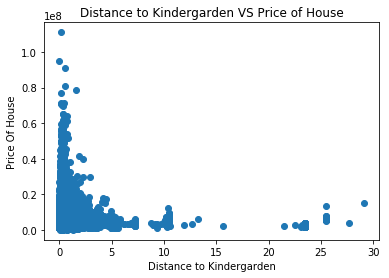

In [29]:
x=data["kindergarten_km"]
y=data["price_doc"]
plt.figure()
plt.scatter(x,y)
plt.xlabel("Distance to Kindergarden")
plt.ylabel("Price Of House")
plt.title("Distance to Kindergarden VS Price of House")
plt.show()


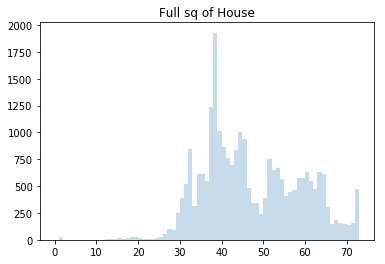

In [30]:
x=data["full_sq"]
plt.figure(2)
plt.hist(x,73,range=(0,73),alpha=0.25)
plt.title("Full sq of House")
plt.show()

In [31]:
# Based on our intuition  full_sq variable will play a significant impact on the pricing of a house. 

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


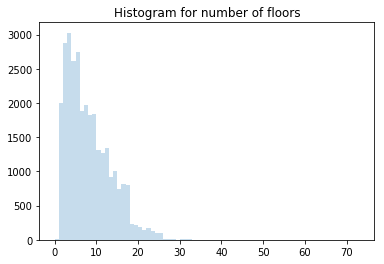

In [32]:
x=data["floor"]
plt.figure(2)
plt.hist(x,73,range=(0,73),alpha=0.25)
plt.title("Histogram for number of floors")
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


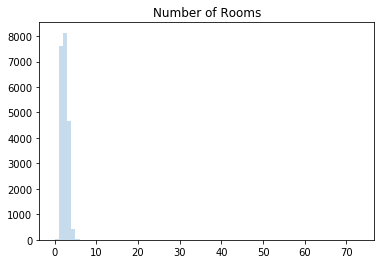

In [33]:
x=data["num_room"]
plt.figure(2)
plt.hist(x,73,range=(0,73),alpha=0.25)
plt.title("Number of Rooms")
plt.show()

In [34]:
np.var(data)

id                                       7.737590e+07
full_sq                                  1.446347e+03
life_sq                                  2.733684e+03
floor                                    2.830134e+01
max_floor                                4.564879e+01
material                                 2.193712e+00
build_year                               2.383418e+10
num_room                                 7.255362e-01
kitch_sq                                 7.989274e+02
state                                    7.746148e-01
area_m                                   4.263923e+14
raion_popul                              3.348976e+09
green_zone_part                          3.065556e-02
indust_part                              1.408626e-02
children_preschool                       1.456615e+07
preschool_quota                          4.707659e+06
preschool_education_centers_raion        8.962516e+00
children_school                          1.591671e+07
school_quota                

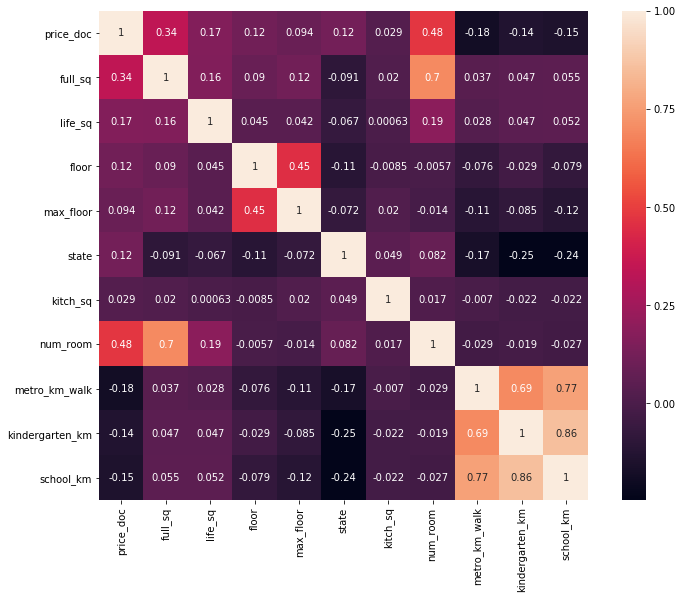

In [35]:
new_data=data[['price_doc','full_sq','life_sq','floor','max_floor','state','kitch_sq','num_room','metro_km_walk','kindergarten_km','school_km',]]
correlation_matrix = new_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix,cbar=True, annot=True, square=True);
plt.show()

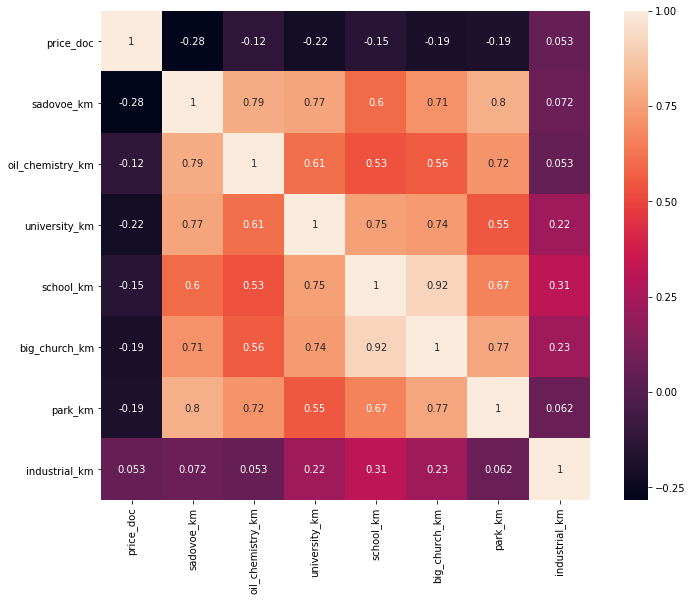

In [36]:
new_data=data[['price_doc','sadovoe_km','oil_chemistry_km','university_km','school_km','big_church_km','park_km','industrial_km',]]
correlation_matrix = new_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix,cbar=True, annot=True, square=True);
plt.show()

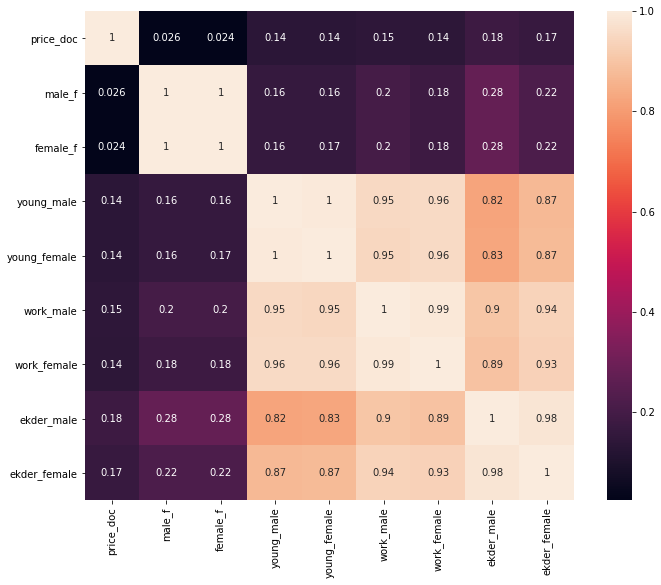

In [37]:
new_data=data[['price_doc','male_f','female_f','young_male','young_female','work_male','work_female','ekder_male','ekder_female']]
correlation_matrix = new_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix,cbar=True, annot=True, square=True);
plt.show()


# First basic data transformation

"cafe_avg_price_500" column is the arithmeatic mean of "cafe_sum_500_min_price_avg" and "cafe_sum_500_max_price_avg". The same is true for "cafe_avg_price_1000", "cafe_avg_price_1500", "cafe_avg_price_2000", "cafe_avg_price_3000" and "cafe_avg_price_5000". thus I drop these columns.

In [38]:
data = data.drop(["cafe_avg_price_500","cafe_avg_price_1000","cafe_avg_price_1500","cafe_avg_price_2000","cafe_avg_price_3000","cafe_avg_price_5000"], axis = 1)

In the first column we have ids for observations. This column will not help us in our prediction because it has unique values for each observation and does not have any connection with the price of the house.

In [39]:
data = data.drop("id",axis = 1)

let's see how many missing values do we have

In [40]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(100)

,Missing Ratio
hospital_beds_raion,47.392603
build_year,44.649011
state,44.498047
cafe_sum_500_min_price_avg,43.585704
cafe_sum_500_max_price_avg,43.585704
max_floor,31.413475
material,31.413475
num_room,31.413475
kitch_sq,31.413475
preschool_quota,21.948738


As we see, there are columns that have the same number of missing values. It is highly probable that values for the columns are missing for the same observations. Let's check it. 

Couples cafe_sum_500_min_price_avg and cafe_sum_500_max_price_avg (43.585704%), cafe_sum_1000_min_price_avg and cafe_sum1000_max_price_avg (21.410521), cafe_sum_1500_min_price_avg and cafe_sum_1500_max_price_avg (13.780316), cafe_sum_2000_min_price_avg and cafe_sum_2000_max_price_avg (5.661120), cafe_sum_3000_min_price_avg and cafe_sum_3000_max_price_avg (3.252273), cafe_sum_5000_min_price_avg and cafe_sum_5000_max_price_avg (0.974697) have the same persentage for missing values, so let's see if all missing values are for the same observations.

In [41]:
print(data.cafe_sum_500_min_price_avg.isna().all() == data.cafe_sum_500_max_price_avg.isna().all())

True


In [42]:
print(data.cafe_sum_1500_min_price_avg.isna().all() == data.cafe_sum_1500_max_price_avg.isna().all())

True


In [43]:
print(data.cafe_sum_2000_min_price_avg.isna().all() == data.cafe_sum_2000_max_price_avg.isna().all())

True


In [44]:
print(data.cafe_sum_3000_min_price_avg.isna().all() == data.cafe_sum_3000_max_price_avg.isna().all())

True


In [45]:
print(data.cafe_sum_5000_min_price_avg.isna().all() == data.cafe_sum_5000_max_price_avg.isna().all())

True


Now we do the same thing for max_floor, material, num_room and kitch_sq (31.413475%).

In [46]:
print(data.max_floor.isna().all() == data.material.isna().all() == data.num_room.isna().all() == data.kitch_sq.isna().all())

True


build_count_mix, raion_build_count_with_material_info, build_count_block, build_count_wood build_count_frame, build_count_brick, build_count_monolith, build_count_panel, build_count_foam, build_count_slag, build_count_before_1920, raion_build_count_with_builddate_info, build_count_1921-1945, build_count_1946-1970, build_count_1971-1995, build_count_after_1995 all are equal in tne count of missing values (16.379508%).

In [47]:
print(data.build_count_mix.isna().all() == data.raion_build_count_with_material_info.isna().all() == data.build_count_block.isna().all() == data.build_count_wood.isna().all() == data.build_count_frame.isna().all() == data.build_count_brick.isna().all() == data.build_count_monolith.isna().all() == data.build_count_panel.isna().all() == data.build_count_foam.isna().all() == data.build_count_slag.isna().all() == data.build_count_before_1920.isna().all() == data.raion_build_count_with_builddate_info.isna().all() == data["build_count_1921-1945"].isna().all() == data["build_count_1946-1970"].isna().all() == data["build_count_1971-1995"].isna().all() == data.build_count_after_1995.isna().all())

True


And the last set of columns with the same ratio of missing values is railroad_station_walk_min , railroad_station_walk_km, metro_km_walk, metro_min_walk, ID_railroad_station_walk with missing values (0.082045%)

In [48]:
print(data.railroad_station_walk_min.isna().all() == data.railroad_station_walk_km.isna().all() == data.metro_km_walk.isna().all() == data.metro_min_walk.isna().all() == data.ID_railroad_station_walk.isna().all())

True


As we expected, all columns that have the same number of missing values, are empty for the same observations.

Now let's try to understand why some values are not registered. Using the previous point that we got and once more time looking at the data that we have we see that the variables that have missing values for the same observations are related to each other. For example, share of buildings built by the specific material. This says that values are not missing at ranodm. One of the possible reason can be that the company that registered the data for houses, started to consider some caracteristics of houses starting some point if time. Let's go deeper into this hypothesis and find out whether registration time has any relation to existance of values.<br> For this purpose I will find year which is the earliest one in the dataset. 

In [49]:
start = 3000
for each in data.timestamp:
    if int(each[:4]) < start:
        start = int(each[:4])
print(start)

2011


As you can see the first year that is registered in our dtaset is 2011 so I will assign Januray 1 of 2011 a value equal to 0 the each next day will have one value greater. This approach will be good in the case when we have price changes over time. I will assume the there are only leap years with 366 days, and each month comtains 31 days. Note that this assumptions are not disrupting the data. 

In [50]:
#this is a heavy command so please be patient while running it
for i in range(len(data.timestamp)):
    data.loc[i,"timestamp"] = (int((data.timestamp[i])[:4])-2011)*366 + (int((data.timestamp[i])[5:7])-1)*31 + int((data.timestamp[i])[8:])

Let's see if nans in each column have any relation to registration time of the house. For this purpose I give unique value to nans and examine the scatter plot of the specific column and **timestamp**.<br>First I consider the column **hospital_beds_raion**.

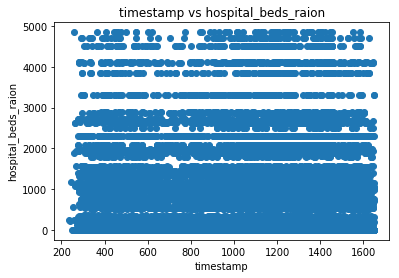

In [51]:
data.hospital_beds_raion = data.hospital_beds_raion.fillna(-1)
plt.scatter(data.timestamp, data.hospital_beds_raion)
plt.title("timestamp vs hospital_beds_raion")
plt.ylabel("hospital_beds_raion")
plt.xlabel("timestamp")
plt.show()

Nothing interesting here, so let's check if hospital_beds_raion is correlated with price_doc or not.

In [52]:
print(data.hospital_beds_raion.corr(data.price_doc))

0.17758879571900543


As we see, correlation coefficient is large enough, so droping the entire column will not be the best choice. Let's fill mising values with mean of the column.

In [53]:
data.hospital_beds_raion[data.hospital_beds_raion == -1] = data.hospital_beds_raion[data.hospital_beds_raion != -1].mean()
missing_data = missing_data.drop("hospital_beds_raion", axis = 0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Then comes **build_year.**

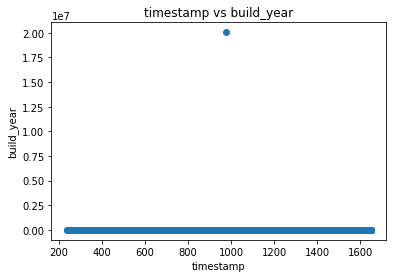

In [54]:
data.build_year = data.build_year.fillna(-1)
plt.scatter(data.timestamp, data.build_year)
plt.title("timestamp vs build_year")
plt.ylabel("build_year")
plt.xlabel("timestamp")
plt.show()

As you can see we have data point diverged from all other poins. Obviously the value of build_year can not be higher that 2018, and we can assume that the outlier was created by mistake. Thus I treat all build_year values greater that 2020 ans lesser that 500 as missing values and assign them -1. 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


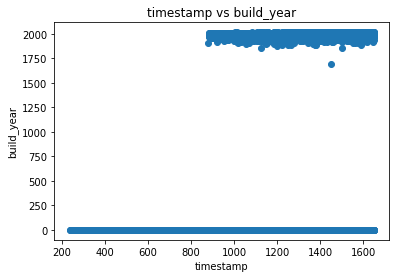

In [55]:
data.build_year[data.build_year > 2020]  = -1
data.build_year[data.build_year < 500]  = -1
plt.scatter(data.timestamp, data.build_year)
plt.title("timestamp vs build_year")
plt.ylabel("build_year")
plt.xlabel("timestamp")
plt.show()

The above graph tells us that houses were registered with valid values of build_year only starting from some point of time(mid-2013). So I fill missing values by the mean of the column.

In [56]:
data.build_year[data.build_year == -1] = data.build_year[data.build_year != -1].median()
missing_data = missing_data.drop("build_year", axis = 0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now, let's look at **state** column.

In [57]:
data.state.value_counts()

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

Again let's consider 33 as missing value and replace it with -1.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


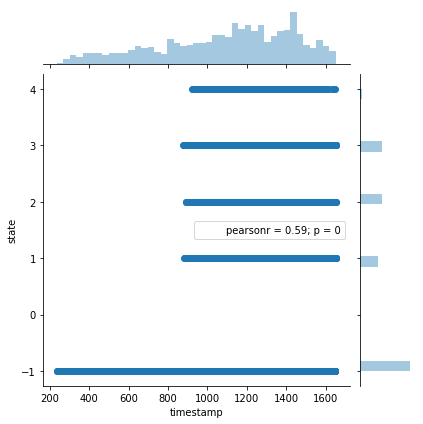

In [58]:
data.state = data.state.fillna(-1)
data.state[data.state == 33] = -1
sns.jointplot(data.timestamp, data.state)

The same picture as in the build_year case, so let's fill missing values with the median of the column.

In [59]:
data.state[data.state == -1] = data.max_floor[data.max_floor != -1].median()
missing_data = missing_data.drop("state", axis = 0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We have already noticed that columns **max_floor**, **material **and** num_room and kitch_sq** have missing values for the same observations. So, let's examine one of them, say the column "material". Again I will asign -1 to missing values of the column and plot it with respect to "timestamp"

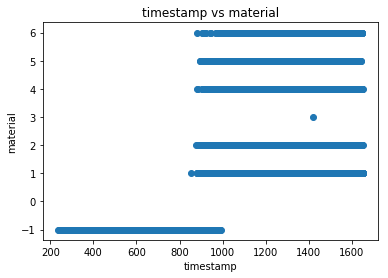

In [60]:
data.material = data.material.fillna(-1)
plt.scatter(data.timestamp, data.material)
plt.title("timestamp vs material")
plt.ylabel("material")
plt.xlabel("timestamp")
plt.show()

We are lucky, as again the reason of missing values for "material" column is the date of registration. Same will be true for the columns max_floor, num_room and kitch_sq, thus, I skip the ploting part for these columns.

In [61]:
data.material[data.material == -1] = data.material[data.material != -1].median()
missing_data = missing_data.drop("material", axis = 0)

data.max_floor = data.max_floor.fillna(data.max_floor.median())
missing_data = missing_data.drop("max_floor", axis = 0)

data.num_room = data.num_room.fillna(data.num_room.median())
missing_data = missing_data.drop("num_room", axis = 0)

data.kitch_sq = data.kitch_sq.fillna(data.kitch_sq.mean())
missing_data = missing_data.drop("kitch_sq", axis = 0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We are left only with two columns that have many missing values "cafe_sum_500_min_price_avg" and "cafe_sum_500_max_price_avg". Lets examine cafe_sum_500_min_price_avg and cafe_sum_1500_min_price_avg.

In [62]:
print(data.cafe_sum_500_max_price_avg.describe())
print(data.cafe_sum_1500_max_price_avg.describe())
print(data.cafe_sum_1500_max_price_avg.corr(data.cafe_sum_500_max_price_avg))

count    17190.000000
mean      1247.023497
std        526.539159
min        500.000000
25%       1000.000000
50%       1166.670000
75%       1500.000000
max       6000.000000
Name: cafe_sum_500_max_price_avg, dtype: float64
count    26272.000000
mean      1206.014867
std        291.297862
min        500.000000
25%       1000.000000
50%       1166.670000
75%       1366.670000
max       4000.000000
Name: cafe_sum_1500_max_price_avg, dtype: float64
0.5616499968274147


We see that these columns are quite similrar and highly correlated. So, I will fill the missing values of cafe_sum_500_max_price_avg by the values of cafe_sum_1500_max_price_avg.

In [63]:
data.cafe_sum_500_max_price_avg = data.cafe_sum_500_max_price_avg.fillna(data.cafe_sum_1500_max_price_avg)
data.cafe_sum_500_min_price_avg = data.cafe_sum_500_min_price_avg.fillna(data.cafe_sum_1500_min_price_avg)

Other columns have a small number of missing values, wich will be filled with means of the columns. The only exception is floor column that can not have non-integer value so we fill it by the median of the column. 

In [64]:
data.floor = data.floor.fillna(data.floor.median())
missing_data = missing_data.drop("floor", axis = 0)

In [65]:
for each in missing_data.index:
    data[each] = data[each].fillna(data[each].mean())

One more time to be sure that no nan values left we run the following command.

In [66]:
data.isnull().values.any()

False

As we are finished with the missing values now let's move on and work on non-numerical values.

In [67]:
data.select_dtypes(include = ["object"])

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
5,Investment,Nizhegorodskoe,no,yes,no,no,yes,no,no,no,no,no,no,no,poor
6,Investment,Sokol'niki,no,no,no,no,no,no,no,no,yes,no,no,no,poor
7,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
8,Investment,Koptevo,no,no,no,no,no,no,no,no,no,no,no,no,poor
9,Investment,Kuncevo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [68]:
data.product_type.value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

I will create dummies from the column product_type and drop one of the columns, as we have n-1 degree of freedom.

In [69]:
temp = pd.get_dummies(data.product_type) # creating a dummy
temp.drop(["Investment"],axis = 1)
data = data.drop("product_type",axis = 1) # drop column from data fromm data
data = data.join(temp) # joining to data

For columns that have yes or no values, I consider them as categorical and assign 0 to no and 1 to yes.

In [70]:
data.culture_objects_top_25 = data.culture_objects_top_25.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.thermal_power_plant_raion = data.thermal_power_plant_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.incineration_raion = data.incineration_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.oil_chemistry_raion = data.oil_chemistry_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.radiation_raion = data.radiation_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.railroad_terminal_raion = data.railroad_terminal_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.big_market_raion = data.big_market_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.nuclear_reactor_raion = data.nuclear_reactor_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.detention_facility_raion = data.detention_facility_raion.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.water_1line = data.water_1line.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.big_road1_1line = data.big_road1_1line.astype("category").cat.reorder_categories(["no","yes"]).cat.codes
data.railroad_1line = data.railroad_1line.astype("category").cat.reorder_categories(["no","yes"]).cat.codes

One more time we need to create dummies. in this time for sub_area column.

In [71]:
data.sub_area.value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  327
Nagornoe                           305
Bogorodskoe                        305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki                     298
Ljublino                           297
Gol'janovo                         295
Severnoe Tushino                   282
Chertanovo Juzhnoe       

In [72]:
temp = pd.get_dummies(data.sub_area) # creating a dummy
temp.drop(["Poselenie Sosenskoe"],axis = 1)
data = data.drop("sub_area",axis = 1) # drop column from data fromm data
data = data.join(temp) # joining to data

Now the column ecology.

In [73]:
data.ecology.value_counts()

poor            8018
no data         7656
good            7174
excellent       3938
satisfactory    3685
Name: ecology, dtype: int64

I will assign all no data values to satifactory to be abel to make comparisons.

In [74]:
data.loc[data.ecology == "no data", 'ecology'] = "satisfactory"

In [75]:
data.ecology.value_counts()

satisfactory    11341
poor             8018
good             7174
excellent        3938
Name: ecology, dtype: int64

In [76]:
data.ecology = data.ecology.astype("category").cat.reorder_categories(["poor","satisfactory", "good", "excellent"]).cat.codes

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 431 entries, timestamp to Zjuzino
dtypes: float64(113), int64(157), int8(13), uint8(148)
memory usage: 67.4 MB


As the above information tells us we ae finished with data manipulation and now we move on the the predicted part.

In [78]:
data.kindergarten_km = np.log(data.kindergarten_km)

In [79]:
data.market_shop_km = np.log(data.market_shop_km)

In [80]:
#data.price_doc = np.log(data.price_doc)

In [81]:
x = data.drop("price_doc", axis = 1)
y = data.price_doc
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [82]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [83]:
lm.score(x_train,y_train)

0.4781432879256121

In [84]:
lm.score(x_test,y_test)

0.44427675400945255

In [85]:
x = data.drop("price_doc", axis = 1)
y = data.price_doc
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [86]:
# Including more libraries into our program
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [87]:
model_rf = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)
model_tree = DecisionTreeRegressor(max_depth=5,random_state=42)

In [88]:
model_tree.fit(x_train,y_train)
tree_p_0 = model_tree.predict(x_train)
tree_p = model_tree.predict(x_test)

In [89]:
model_rf.fit(x_train,y_train)
rf_p_0 = model_rf.predict(x_train)
rf_p = model_rf.predict(x_test)

In [90]:
model_gb.fit(x_train,y_train)
gb_p_0 = model_gb.predict(x_train)
gb_p = model_gb.predict(x_test)

In [91]:
print("Train")
for i in [tree_p_0,rf_p_0,gb_p_0]:

    print("RMSE:",np.round(np.sqrt(mean_squared_error(y_train,i)),decimals=2))

    print("MSE",np.round(mean_squared_error(y_train,i),decimals=2))

    print("\n")


print("Test")
for i in [tree_p,rf_p,gb_p]:

    print("RMSE:",np.round(np.sqrt(mean_squared_error(y_test,i)),decimals=2))

    print("MSE",np.round(mean_squared_error(y_test,i),decimals=2))

    print("\n")
  
  
print("Train")

print("tree:", np.round(model_tree.score(x_train,y_train)*100,decimals=2), sep = " ")
print("random forest:", np.round(model_rf.score(x_train,y_train)*100,decimals=2), sep =" ")
print("gradient boosting", np.round(model_gb.score(x_train,y_train)*100,decimals=2))

print("\n")
print("Test")

print("tree:",np.round(model_tree.score(x_test,y_test)*100,decimals=2),sep = " ")
print("random forest:",np.round(model_rf.score(x_test,y_test)*100,decimals=2),sep = " ")
print("gradient boosting:",np.round(model_gb.score(x_test,y_test)*100,decimals=2), sep = " ")

Train
RMSE: 3009489.78
MSE 9057028716738.59


RMSE: 2863083.93
MSE 8197249592864.86


RMSE: 2418917.8
MSE 5851163312828.69


Test
RMSE: 2943987.54
MSE 8667062633974.83


RMSE: 2841156.83
MSE 8072172149515.28


RMSE: 2546913.54
MSE 6486768560484.96


Train
tree: 61.35
random forest: 65.02
gradient boosting 75.03


Test
tree: 58.9
random forest: 61.72
gradient boosting: 69.24


In [92]:
importances=model_tree.feature_importances_
features=pd.DataFrame(importances,columns=['importances'],index=x.columns)
#print(features[features.importances>0])
selected=features.loc[features.importances>0.001]

In [93]:
selected_features=selected.index
x_train_2=x_train[selected_features]
x_test_2=x_test[selected_features]

In [94]:
model_rf_selected = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
model_gb_selected = GradientBoostingRegressor(random_state=42)
model_tree_selected = DecisionTreeRegressor(max_depth=5,random_state=42)

In [95]:
model_tree_selected.fit(x_train_2,y_train)
tree_p_0 = model_tree_selected.predict(x_train_2)
tree_p = model_tree_selected.predict(x_test_2)

In [96]:
model_rf_selected.fit(x_train_2,y_train)
rf_p_0 = model_rf_selected.predict(x_train_2)
rf_p = model_rf_selected.predict(x_test_2)

In [97]:
model_gb_selected.fit(x_train_2,y_train)
gb_p_0 = model_gb_selected.predict(x_train_2)
gb_p = model_gb_selected.predict(x_test_2)

In [98]:
print("Train")
for i in [tree_p_0,rf_p_0,gb_p_0]:

    print("RMSE:",np.round(np.sqrt(mean_squared_error(y_train,i)),decimals=2))

    print("MSE",np.round(mean_squared_error(y_train,i),decimals=2))

    print("\n")


print("Test")
for i in [tree_p,rf_p,gb_p]:

    print("RMSE:",np.round(np.sqrt(mean_squared_error(y_test,i)),decimals=2))

    print("MSE",np.round(mean_squared_error(y_test,i),decimals=2))

    print("\n")
  
  
print("Train")

print("tree:", np.round(model_tree_selected.score(x_train_2,y_train)*100,decimals=2), sep = " ")
print("random forest:", np.round(model_rf_selected.score(x_train_2,y_train)*100,decimals=2), sep =" ")
print("gradient boosting", np.round(model_gb_selected.score(x_train_2,y_train)*100,decimals=2))

print("\n")
print("Test")

print("tree:",np.round(model_tree_selected.score(x_test_2,y_test)*100,decimals=2),sep = " ")
print("random forest:",np.round(model_rf_selected.score(x_test_2,y_test)*100,decimals=2),sep = " ")
print("gradient boosting:",np.round(model_gb_selected.score(x_test_2,y_test)*100,decimals=2), sep = " ")

Train
RMSE: 3010003.89
MSE 9060123392919.57


RMSE: 2909971.72
MSE 8467935387244.47


RMSE: 2643930.7
MSE 6990369534972.89


Test
RMSE: 2944188.01
MSE 8668243024339.06


RMSE: 2859213.85
MSE 8175103843525.57


RMSE: 2628950.04
MSE 6911378290143.74


Train
tree: 61.34
random forest: 63.86
gradient boosting 70.17


Test
tree: 58.89
random forest: 61.23
gradient boosting: 67.22


# PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components = 5)

In [101]:
x = data.drop("price_doc", axis = 1)
y = data.price_doc

In [102]:
X_pca = pca.fit_transform(x)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.25,random_state=42)

In [104]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [105]:
lm.score(x_test,y_test)

0.10140220545145273

In [106]:
pca.explained_variance_ratio_

array([9.82450195e-01, 1.55586226e-02, 9.91146052e-04, 3.69932710e-04,
       2.57637472e-04])

[0.98 1.   1.   1.   1.  ]


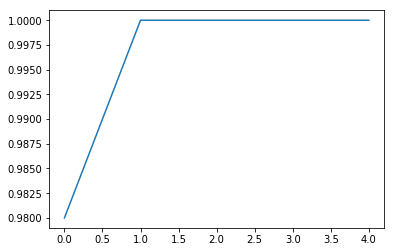

In [107]:
PCA_plot_y = np.round(np.cumsum(pca.explained_variance_ratio_),2)
print(PCA_plot_y)

plt.plot(PCA_plot_y[:10])
plt.show()